<a href="https://colab.research.google.com/github/daibiaoxuwu/colab_code/blob/master/short.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 以相似度为训练目标

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 训练数据生成器

In [2]:
!git clone https://github.com/daibiaoxuwu/05wan11_11
!git clone https://github.com/daibiaoxuwu/05wan11b2
!git clone https://github.com/daibiaoxuwu/05wan13
!git clone https://github.com/daibiaoxuwu/05wan13b3
!git clone https://github.com/daibiaoxuwu/05wan14
!git clone https://github.com/daibiaoxuwu/05wan14b2
!git clone https://github.com/daibiaoxuwu/3181
!git clone https://github.com/daibiaoxuwu/3181bb
!git clone https://github.com/daibiaoxuwu/3182
!git clone https://github.com/daibiaoxuwu/3182b
!git clone https://github.com/daibiaoxuwu/317
!git clone https://github.com/daibiaoxuwu/317b



Cloning into '05wan11_11'...
remote: Enumerating objects: 30512, done.
remote: Counting objects: 100% (30512/30512), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 30512 (delta 30504), reused 30512 (delta 30504), pack-reused 0
Receiving objects: 100% (30512/30512), 9.61 MiB | 13.62 MiB/s, done.
Resolving deltas: 100% (30504/30504), done.
Cloning into '05wan11b2'...
remote: Enumerating objects: 183, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 183 (delta 0), reused 183 (delta 0), pack-reused 0
Receiving objects: 100% (183/183), 859.93 KiB | 2.23 MiB/s, done.
Cloning into '05wan13'...
remote: Enumerating objects: 40909, done.
remote: Counting objects: 100% (40909/40909), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 40909 (delta 40900), reused 40909 (delta 40900), pack-reused 0
Receiving objects: 100% (40909/40909), 8.82 MiB | 12.45 MiB/s, done.
Resolving deltas: 100% (40900

In [3]:
!git clone https://github.com/daibiaoxuwu/05wan12
!git clone https://github.com/daibiaoxuwu/05wan12b

Cloning into '05wan12'...
remote: Enumerating objects: 78989, done.
remote: Counting objects: 100% (78989/78989), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 78989 (delta 78980), reused 78989 (delta 78980), pack-reused 0
Receiving objects: 100% (78989/78989), 23.51 MiB | 21.26 MiB/s, done.
Resolving deltas: 100% (78980/78980), done.
Checking out files: 100% (78987/78987), done.
Cloning into '05wan12b'...
remote: Enumerating objects: 406, done.
remote: Counting objects: 100% (406/406), done.
remote: Compressing objects: 100% (304/304), done.
remote: Total 406 (delta 102), reused 406 (delta 102), pack-reused 0
Receiving objects: 100% (406/406), 380.85 KiB | 1.40 MiB/s, done.
Resolving deltas: 100% (102/102), done.


In [4]:
!git clone https://github.com/daibiaoxuwu/test7

Cloning into 'test7'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 102 (delta 0), reused 102 (delta 0), pack-reused 0
Receiving objects: 100% (102/102), 442.30 KiB | 1.51 MiB/s, done.


In [0]:
import os
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

datasizex = 9
datasizey = 9

picnum = 20
lowpercent = 125.0
highpercent = 233.0
enhance = 4
def read_data(path1,path2,sx,sy):

  x_train0 = []
  y_train0 = dict()
  idxes = dict()

  #read clock
  #read and /255
  for filename in os.listdir(path2):
      if 'git' in filename: continue
      ans = cv2.imread(os.path.join(path2,filename),cv2.IMREAD_GRAYSCALE).astype('float32')     
      ans = np.clip((ans-lowpercent)/(highpercent - lowpercent),0,1)
      y_train0[int(filename[:-4])]=ans

  keys = list(y_train0.keys())
  
  #read data
  #add an axis and /255
  
  filelist = os.listdir(path1)
  random.shuffle(filelist)
  index = 0
  for filename in filelist:
      if 'git' in filename or 'c.jpg' in filename: continue
      ftime = int(filename.split('_')[0])
      value = max(filter(lambda t:t<ftime,keys))
      if(abs(ftime-value)<10000):continue

      x_train0.append(cv2.imread(os.path.join(path1,filename)).astype('float32')/255.0)
      if value not in idxes:idxes[value]=[index]
      else: idxes[value].append(index)
      index += 1

  #index data
  print(len(x_train0),index,len(y_train0),len(idxes.keys()))
  lens = [len(i) for i in idxes.values()]
  print(min(lens),max(lens),np.average(lens))
  for key,val in list(idxes.items()):
    if len(val)<picnum:
      idxes.pop(key)
  

  #generator
  def data_generator(ikeys_t):
    while True:
      
      dataout = []

      '''
      while True:
        key = random.choice(ikeys_t)
        idx2 = random.sample(idxes[key],picnum)
        posx = random.randint(0,picsizex-datasizex)
        posy = random.randint(0,picsizey-datasizey)
        pic = x_train0[idx2[i]][posx:posx+datasizex,posy:posy+datasizey,:]
        if(np.sum(pic) < 175):
          for i in range(picnum):
            dataout[i].append(x_train0[idx2[i]][posx:posx+datasizex,posy:posy+datasizey,:])
          ansout.append(y_train0[key][posx:posx+datasizex,posy:posy+datasizey])
          break
      '''
      key = random.choice(ikeys_t)
      idx2 = random.sample(idxes[key],picnum)
      posx = random.randint(0,x_train0[0].shape[0]-datasizex)
      posy = random.randint(0,x_train0[0].shape[1]-datasizey)
    
      for i in range(picnum):
        dataout.append(x_train0[idx2[i]][posx:posx+datasizex,posy:posy+datasizey,:])
      ansout = y_train0[key][posx*enhance:(posx+datasizex)*enhance,posy*enhance:(posy+datasizey)*enhance]
      yield dataout,ansout
      
  def pic_generator(ikeys_t):
    while True:
      key = random.choice(ikeys_t)
      idx2 = random.sample(idxes[key],picnum)
      data=[x_train0[i] for i in idx2]
      ans=y_train0[key]
      yield data,ans

  #split
  ikeys = list(idxes.keys())
  random.shuffle(ikeys)
  ltrain = int(len(ikeys)*0.8)  
  train_generator = data_generator(ikeys[:ltrain])
  test_generator = data_generator(ikeys[ltrain:])
  train_pic_generator = pic_generator(ikeys[:ltrain])
  test_pic_generator = pic_generator(ikeys[ltrain:])

  return train_generator,test_generator,train_pic_generator,test_pic_generator



In [22]:

from matplotlib import pyplot as plt
picsizex = 18
picsizey = 38
train_generators = [0,0,0,0,0,0,0]
test_generators = [0,0,0,0,0,0,0]
train_pic_generators = [0,0,0,0,0,0,0]
test_pic_generators = [0,0,0,0,0,0,0]
train_generators[0],test_generators[0],train_pic_generators[0],test_pic_generators[0] = read_data('05wan11_11','05wan11b2',18,38)
train_generators[1],test_generators[1],train_pic_generators[1],test_pic_generators[1] = read_data('05wan13','05wan13b3',14,31)
train_generators[2],test_generators[2],train_pic_generators[2],test_pic_generators[2] = read_data('05wan14','05wan14b2',14,31)
train_generators[3],test_generators[3],train_pic_generators[3],test_pic_generators[3] = read_data('3182','3182b',10,47)
train_generators[4],test_generators[4],train_pic_generators[4],test_pic_generators[4] = read_data('3181','3181bb',10,47)
train_generators[5],test_generators[5],train_pic_generators[5],test_pic_generators[5] = read_data('317','317b',11,22)
train_generators[6],test_generators[6],train_pic_generators[6],test_pic_generators[6] = read_data('526','526b',11,22)
def stack_generator(generators):
  while True:
    dataout = []
    for i in range(picnum):dataout.append([])
    ansout = []
    rnd = 0#random.randint(0,5)
    for train2 in range(32):
      data,ans=next(generators[random.randint(0,6)])
      for i in range(picnum):
        dataout[i].append(data[i])
      ansout.append(ans)
    yield [np.stack(data2) for data2 in dataout],np.stack(ansout)

train_generator = stack_generator(train_generators)
test_generator = stack_generator(test_generators)


27456 27456 181 138
79 207 198.95652173913044
36839 36839 608 190
87 202 193.88947368421051
63590 63590 343 335
27 204 189.82089552238807
48799 48799 344 305
97 186 159.9967213114754
58666 58666 355 351
100 189 167.13960113960113
48374 48374 435 278
14 188 174.0071942446043
23792 23792 432 139
20 185 171.16546762589928


1050.0
0.0 1.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


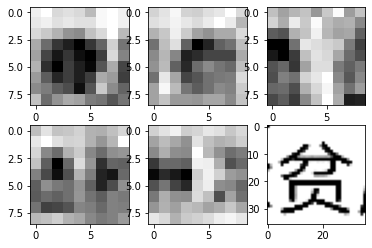

In [7]:
data,ans = next(test_generator)
for pics in data:
  for i in range(6):
    plt.subplot(231+i)
    plt.imshow(pics[i,:,:,0],cmap='gray')
ans[0,0,0]=0
ans[0,1,0]=1
plt.imshow(ans[0],cmap='gray')
print(np.sum(ans[0]))
print(np.min(ans[0]),np.max(ans[0]))

# 数据初始化完成。


# 装载Tensorflow

In [0]:

from __future__ import absolute_import, division, print_function, unicode_literals

# 安装 TensorFlow
try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf

In [0]:
from skimage.metrics import peak_signal_noise_ratio,structural_similarity, mean_squared_error
class show_accuracy(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if epoch % 5 == 1:
      data,ans = next(test_generator)
      data = [data[x][5][np.newaxis,:,:,:] for x in range(picnum)]
      ans = ans[5]
      import matplotlib
      cmap = matplotlib.cm.gray 
      cmap.set_bad(color='black')

      pred = model.predict(data) #shape:(1,11,11,1) because last layer is conv not dense
      #pred = np.clip(pred,0,1)
      #pred = (pred-np.min(pred))/(np.max(pred)-np.min(pred))
      #pred = softmax(pred)
      pred[0,0,0,0]=0
      pred[0,-1,-1,0]=1
      ans[0,0]=0
      ans[-1,-1]=1
      for i in range(6):
        plt.subplot(231+i)
        plt.imshow(data[i][0,:,:,0],cmap=cmap)
      plt.show()
      plt.subplot(121)
      plt.imshow(pred[0,:,:,0],cmap=cmap)
      plt.colorbar()
      #ans = np.clip((ans-np.percentile(ans,10))/(np.percentile(ans,90)-np.percentile(ans,10)),0,1)
      plt.subplot(122)
      plt.imshow(ans,cmap=cmap)
      plt.colorbar()
      plt.show()
#      print('psnr',peak_signal_noise_ratio(np.clip(pred[0,:,:,0],0,1),ans))
#      print('ssim',structural_similarity(np.clip(pred[0,:,:,0],0,1),ans))
      print('mse',mean_squared_error(np.clip(pred[0,:,:,0],0,1),ans))



In [10]:
        '''session = tf.compat.v1.Session()
graph = tf.compat.v1.get_default_graph()
with graph.as_default():
  with session.as_default():
        '''    

        inputs = [tf.keras.layers.Input(shape=(datasizex,datasizey,3))  for i in range(picnum)]
        #inputs = tf.keras.layers.Input(shape=(5,12,12,1))
        convg1 = 0
        convd1 = 0
        convh1 = inputs
        inputs_big = inputs
        for layernum in range(5):
          conv_a1 = tf.keras.layers.Conv2D(32, (3, 3), padding = 'Same',   use_bias=False)
          conva1 = [conv_a1(convh1[i]) for i in range(picnum)]
          conva1 = [tf.keras.layers.LeakyReLU()(tf.keras.layers.BatchNormalization()(conva1[i]))for i in range(picnum)]
          #drop_a1 = tf.keras.layers.Dropout(0.2)
          #conva1 = drop_a1(conva1)
          
          

          conv_c1 = tf.keras.layers.Conv2D(32, (3, 3), padding = 'Same',   use_bias=False)
          convc1 = [conv_c1(inputs_big[i]) for i in range(picnum)]
          convc1 = [tf.keras.layers.LeakyReLU()(tf.keras.layers.BatchNormalization()(convc1[i]))for i in range(picnum)]
          #drop_b1 = tf.keras.layers.Dropout(0.2)
          #convc1 = drop_a1(convc1)
        
          convs1 = tf.stack(conva1)
          convf1 = [tf.reduce_sum(convs1 * tf.exp(convs1*t) / tf.reduce_sum(tf.exp(convs1*t), axis=[0]),axis=[0]) for t in [-1,-0.5, 0,0.5, 1]]
          #convf1 = [
          #    tf.math.reduce_max(convs1, axis=[0]),
          #    tf.math.reduce_mean(convs1, axis=[0]),
          #    tf.math.reduce_min(convs1, axis=[0]),
          #]

          conv_g1 = tf.keras.layers.Conv2D(32, (3, 3), padding = 'Same',   use_bias=False)
          convg1 = [conv_g1(convf1[i]) for i in range(5)]
          convg1 = [tf.keras.layers.LeakyReLU()(tf.keras.layers.BatchNormalization()(convg1[i]))for i in range(5)]

          drop_c1 = tf.keras.layers.Dropout(0.2)
          convh1 = [drop_c1(tf.concat(convg1+[convc1[i]],axis=3)) for i in range(picnum)]
          if(layernum % 2 == 1):
            convex1 = tf.keras.layers.Conv2D(32, (1, 1), padding = 'Same',  activation='relu')
            convh1 = [tf.keras.layers.UpSampling2D(size=(2, 2), data_format=None)(i) for i in convh1]
            convh1 = [convex1(convh1[i]) for i in range(picnum)]
            inputs_big = [tf.keras.layers.UpSampling2D(size=(2, 2), data_format=None)(i) for i in inputs_big]
        convh3 = tf.concat(convg1+convc1,axis=3)

        #convx1 = tf.keras.layers.Conv2D(32, (3, 3), padding = 'Same',  activation='relu')(convh3)
        #convx2 = tf.keras.layers.Dropout(0.2)(convx1)
        #convx3 = tf.keras.layers.Conv2D(64, (3, 3), padding = 'Same', activation='relu')(convx2)
        '''
        convx3 = tf.keras.layers.Flatten()(convx2)

        #keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)
        convx4 = tf.keras.layers.Dropout(0.2)(convx3)

        convy1 = tf.keras.layers.Dense(21*45)(convx4)
        #convy3 = tf.keras.layers.Dense(10,activation='softmax')(convy1)
        convy4 = tf.keras.layers.Reshape([21,45])(convy1)
        '''

        convx4 = tf.keras.layers.Conv2D(1, (3, 3), padding = 'Same')(convh3)

        model = tf.keras.Model(inputs=inputs, outputs=convx4)
        #tf.reduce_mean(tf.image.ssim(reconstructed, truth, 1.0))
        model.compile(optimizer='adam',#tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
                        #loss=lambda y_pred,y_true:1-tf.reduce_mean(tf.image.ssim_multiscale(tf.clip_by_value(y_pred,0,1), y_true, 255))#-tf.reduce_mean(tf.image.psnr(tf.clip_by_value(y_pred,0,1), y_true, 1.0))
                      loss='mse',
                      metrics=['mse']
                      )
                      
        '''                    
        run_meta = tf.compat.v1.RunMetadata()
        opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
    
        # We use the Keras session graph in the call to the profiler.
        flops = tf.compat.v1.profiler.profile(graph=graph,
                                              run_meta=run_meta, cmd='op', options=opts)
    
        print(flops.total_float_ops)
'''

"                    \nrun_meta = tf.compat.v1.RunMetadata()\nopts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()\n    \n# We use the Keras session graph in the call to the profiler.\nflops = tf.compat.v1.profiler.profile(graph=graph,\n                                      run_meta=run_meta, cmd='op', options=opts)\n    \nprint(flops.total_float_ops)\n"

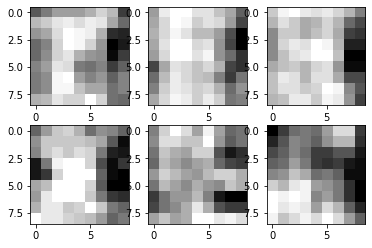

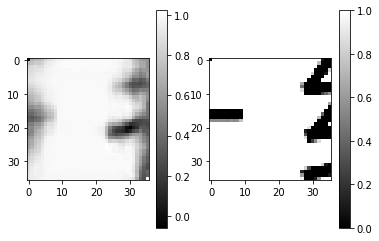

mse 0.06776875556839825


In [24]:
checkpoint_path = "/content/drive/My Drive/checkpoints/ts6/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
checkpoint_path = "/content/drive/My Drive/checkpoints/ts7/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,monitor='val_loss')#,save_best_only=True,mode='min')
show_accuracy_callback = show_accuracy()
show_accuracy_callback.on_epoch_end(epoch=1)

Epoch 1/200
500/500 - 213s - loss: 0.1057 - mse: 0.1057 - val_loss: 0.1039 - val_mse: 0.1039
Epoch 2/200


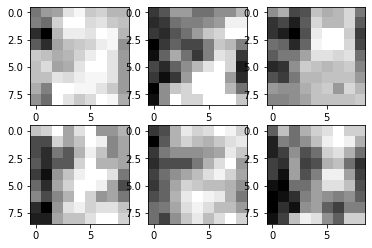

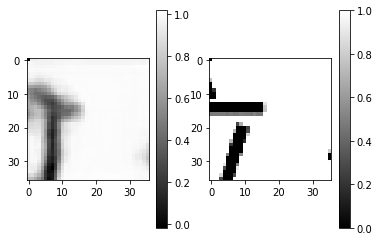

mse 0.042811333471679605
500/500 - 212s - loss: 0.1035 - mse: 0.1035 - val_loss: 0.1023 - val_mse: 0.1023
Epoch 3/200
500/500 - 211s - loss: 0.1033 - mse: 0.1033 - val_loss: 0.1080 - val_mse: 0.1080
Epoch 4/200
500/500 - 211s - loss: 0.1027 - mse: 0.1027 - val_loss: 0.1014 - val_mse: 0.1014
Epoch 5/200
500/500 - 211s - loss: 0.1024 - mse: 0.1024 - val_loss: 0.1028 - val_mse: 0.1028
Epoch 6/200
500/500 - 211s - loss: 0.1029 - mse: 0.1029 - val_loss: 0.1039 - val_mse: 0.1039
Epoch 7/200


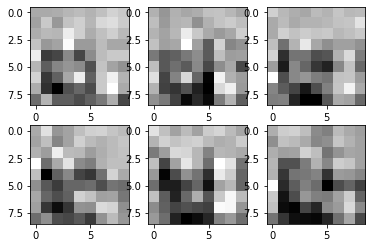

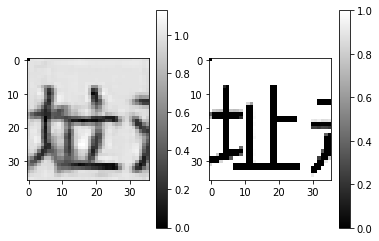

mse 0.08339904149764268
500/500 - 212s - loss: 0.1024 - mse: 0.1024 - val_loss: 0.1022 - val_mse: 0.1022
Epoch 8/200
500/500 - 212s - loss: 0.1029 - mse: 0.1029 - val_loss: 0.1042 - val_mse: 0.1042
Epoch 9/200
500/500 - 212s - loss: 0.1021 - mse: 0.1021 - val_loss: 0.1046 - val_mse: 0.1046
Epoch 10/200
500/500 - 211s - loss: 0.1022 - mse: 0.1022 - val_loss: 0.1037 - val_mse: 0.1037
Epoch 11/200
500/500 - 211s - loss: 0.1022 - mse: 0.1022 - val_loss: 0.1099 - val_mse: 0.1099
Epoch 12/200


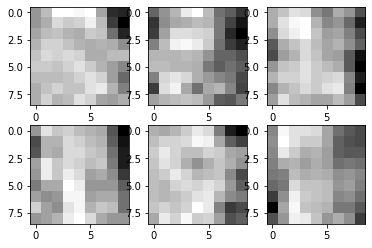

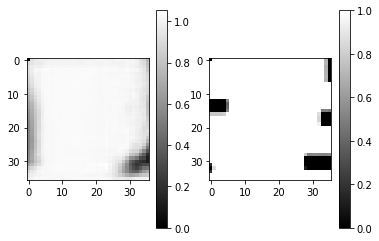

mse 0.039035627812864127
500/500 - 213s - loss: 0.1020 - mse: 0.1020 - val_loss: 0.1015 - val_mse: 0.1015
Epoch 13/200
500/500 - 212s - loss: 0.1022 - mse: 0.1022 - val_loss: 0.1028 - val_mse: 0.1028
Epoch 14/200
500/500 - 212s - loss: 0.1018 - mse: 0.1018 - val_loss: 0.1059 - val_mse: 0.1059
Epoch 15/200
500/500 - 212s - loss: 0.1017 - mse: 0.1017 - val_loss: 0.1028 - val_mse: 0.1028
Epoch 16/200
500/500 - 212s - loss: 0.1027 - mse: 0.1027 - val_loss: 0.1057 - val_mse: 0.1057
Epoch 17/200


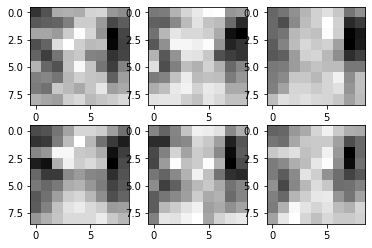

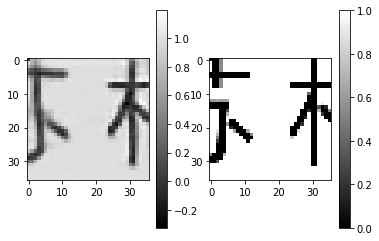

mse 0.03282971485320438
500/500 - 212s - loss: 0.1021 - mse: 0.1021 - val_loss: 0.1010 - val_mse: 0.1010
Epoch 18/200
500/500 - 212s - loss: 0.1022 - mse: 0.1022 - val_loss: 0.1048 - val_mse: 0.1048
Epoch 19/200
500/500 - 212s - loss: 0.1016 - mse: 0.1016 - val_loss: 0.1049 - val_mse: 0.1049
Epoch 20/200
500/500 - 212s - loss: 0.1021 - mse: 0.1021 - val_loss: 0.1008 - val_mse: 0.1008
Epoch 21/200
500/500 - 212s - loss: 0.1014 - mse: 0.1014 - val_loss: 0.1048 - val_mse: 0.1048
Epoch 22/200


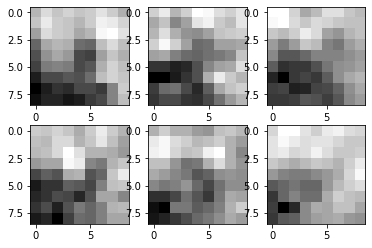

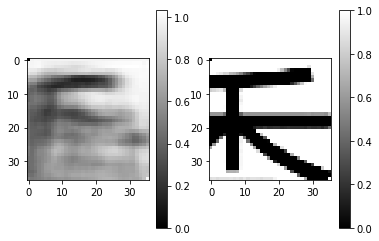

mse 0.17047654952295324
500/500 - 213s - loss: 0.1016 - mse: 0.1016 - val_loss: 0.1037 - val_mse: 0.1037
Epoch 23/200
500/500 - 212s - loss: 0.1016 - mse: 0.1016 - val_loss: 0.1039 - val_mse: 0.1039
Epoch 24/200
500/500 - 211s - loss: 0.1012 - mse: 0.1012 - val_loss: 0.1039 - val_mse: 0.1039
Epoch 25/200
500/500 - 212s - loss: 0.1018 - mse: 0.1018 - val_loss: 0.0998 - val_mse: 0.0998
Epoch 26/200
500/500 - 212s - loss: 0.1013 - mse: 0.1013 - val_loss: 0.1048 - val_mse: 0.1048
Epoch 27/200


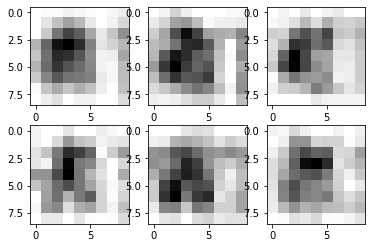

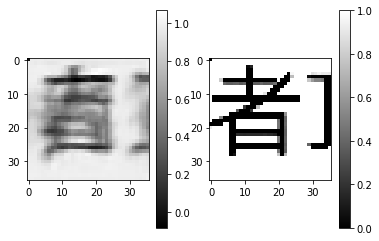

mse 0.10325560431841564
500/500 - 213s - loss: 0.1015 - mse: 0.1015 - val_loss: 0.1047 - val_mse: 0.1047
Epoch 28/200
500/500 - 211s - loss: 0.1013 - mse: 0.1013 - val_loss: 0.1040 - val_mse: 0.1040
Epoch 29/200
500/500 - 212s - loss: 0.1008 - mse: 0.1008 - val_loss: 0.1017 - val_mse: 0.1017
Epoch 30/200
500/500 - 212s - loss: 0.1015 - mse: 0.1015 - val_loss: 0.1033 - val_mse: 0.1033
Epoch 31/200
500/500 - 212s - loss: 0.1009 - mse: 0.1009 - val_loss: 0.1015 - val_mse: 0.1015
Epoch 32/200


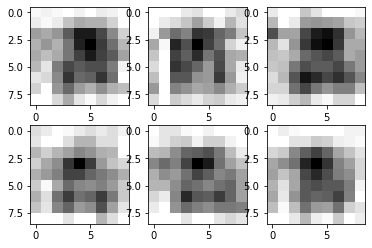

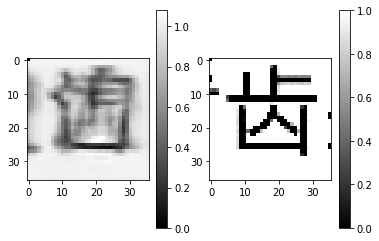

mse 0.09573305436208135
500/500 - 212s - loss: 0.1010 - mse: 0.1010 - val_loss: 0.1140 - val_mse: 0.1140
Epoch 33/200
500/500 - 211s - loss: 0.1011 - mse: 0.1011 - val_loss: 0.1104 - val_mse: 0.1104
Epoch 34/200
500/500 - 211s - loss: 0.1010 - mse: 0.1010 - val_loss: 0.1051 - val_mse: 0.1051
Epoch 35/200
500/500 - 211s - loss: 0.1002 - mse: 0.1002 - val_loss: 0.1035 - val_mse: 0.1035
Epoch 36/200
500/500 - 211s - loss: 0.1014 - mse: 0.1014 - val_loss: 0.1080 - val_mse: 0.1080
Epoch 37/200


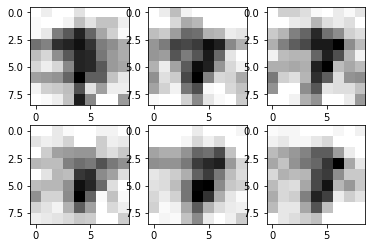

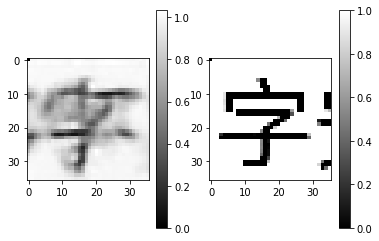

mse 0.09344549084461334
500/500 - 213s - loss: 0.1010 - mse: 0.1010 - val_loss: 0.1043 - val_mse: 0.1043
Epoch 38/200
500/500 - 212s - loss: 0.1011 - mse: 0.1011 - val_loss: 0.1026 - val_mse: 0.1026
Epoch 39/200
500/500 - 212s - loss: 0.1017 - mse: 0.1017 - val_loss: 0.1026 - val_mse: 0.1026
Epoch 40/200
500/500 - 211s - loss: 0.1019 - mse: 0.1019 - val_loss: 0.1039 - val_mse: 0.1039
Epoch 41/200
500/500 - 211s - loss: 0.1010 - mse: 0.1010 - val_loss: 0.1045 - val_mse: 0.1045
Epoch 42/200


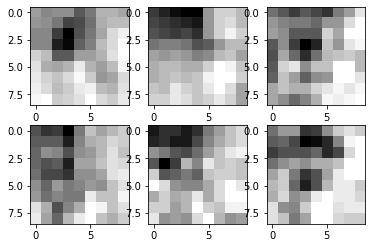

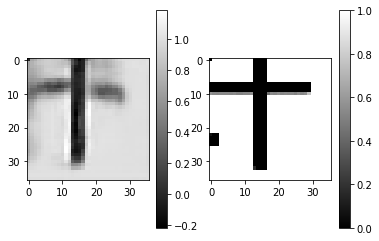

mse 0.03884918088292629
500/500 - 212s - loss: 0.1014 - mse: 0.1014 - val_loss: 0.1042 - val_mse: 0.1042
Epoch 43/200
500/500 - 212s - loss: 0.1010 - mse: 0.1010 - val_loss: 0.1067 - val_mse: 0.1067
Epoch 44/200
500/500 - 211s - loss: 0.1006 - mse: 0.1006 - val_loss: 0.1051 - val_mse: 0.1051
Epoch 45/200
500/500 - 212s - loss: 0.1008 - mse: 0.1008 - val_loss: 0.1045 - val_mse: 0.1045
Epoch 46/200
500/500 - 211s - loss: 0.1009 - mse: 0.1009 - val_loss: 0.1049 - val_mse: 0.1049
Epoch 47/200


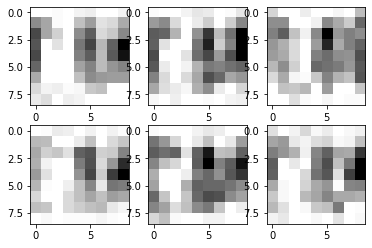

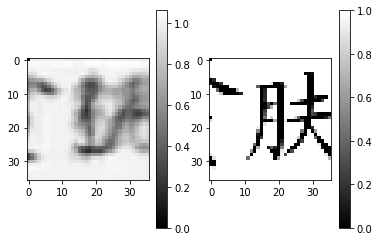

mse 0.09926903950624606
500/500 - 213s - loss: 0.1008 - mse: 0.1008 - val_loss: 0.1057 - val_mse: 0.1057
Epoch 48/200
500/500 - 212s - loss: 0.1011 - mse: 0.1011 - val_loss: 0.1056 - val_mse: 0.1056
Epoch 49/200
500/500 - 212s - loss: 0.1011 - mse: 0.1011 - val_loss: 0.1026 - val_mse: 0.1026
Epoch 50/200
500/500 - 212s - loss: 0.1013 - mse: 0.1013 - val_loss: 0.1050 - val_mse: 0.1050
Epoch 51/200
500/500 - 212s - loss: 0.1000 - mse: 0.1000 - val_loss: 0.1080 - val_mse: 0.1080
Epoch 52/200


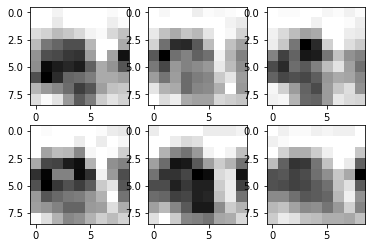

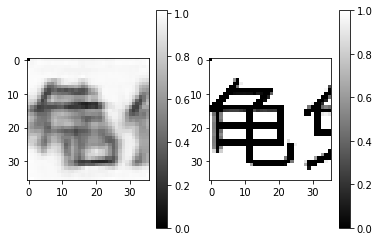

mse 0.11254486560342103
500/500 - 213s - loss: 0.1007 - mse: 0.1007 - val_loss: 0.1048 - val_mse: 0.1048
Epoch 53/200
500/500 - 211s - loss: 0.1005 - mse: 0.1005 - val_loss: 0.1050 - val_mse: 0.1050
Epoch 54/200
500/500 - 212s - loss: 0.1006 - mse: 0.1006 - val_loss: 0.1033 - val_mse: 0.1033
Epoch 55/200
500/500 - 212s - loss: 0.1010 - mse: 0.1010 - val_loss: 0.1082 - val_mse: 0.1082
Epoch 56/200
500/500 - 212s - loss: 0.1009 - mse: 0.1009 - val_loss: 0.1012 - val_mse: 0.1012
Epoch 57/200


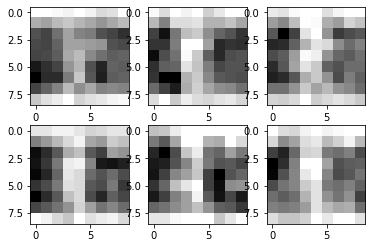

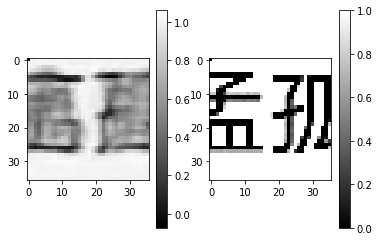

mse 0.1248842075729771
500/500 - 212s - loss: 0.1003 - mse: 0.1003 - val_loss: 0.1057 - val_mse: 0.1057
Epoch 58/200
500/500 - 211s - loss: 0.1010 - mse: 0.1010 - val_loss: 0.1062 - val_mse: 0.1062
Epoch 59/200
500/500 - 212s - loss: 0.1008 - mse: 0.1008 - val_loss: 0.1034 - val_mse: 0.1034
Epoch 60/200
500/500 - 212s - loss: 0.1005 - mse: 0.1005 - val_loss: 0.1033 - val_mse: 0.1033
Epoch 61/200
500/500 - 211s - loss: 0.1005 - mse: 0.1005 - val_loss: 0.1050 - val_mse: 0.1050
Epoch 62/200


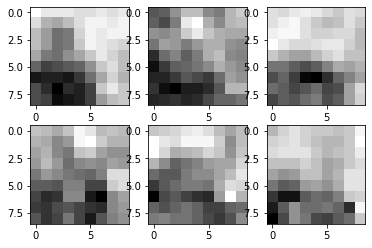

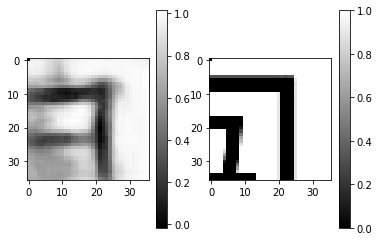

mse 0.1464812315035836
500/500 - 212s - loss: 0.1011 - mse: 0.1011 - val_loss: 0.1037 - val_mse: 0.1037
Epoch 63/200
500/500 - 211s - loss: 0.1006 - mse: 0.1006 - val_loss: 0.1084 - val_mse: 0.1084
Epoch 64/200
500/500 - 212s - loss: 0.1006 - mse: 0.1006 - val_loss: 0.1028 - val_mse: 0.1028
Epoch 65/200
500/500 - 212s - loss: 0.1009 - mse: 0.1009 - val_loss: 0.1057 - val_mse: 0.1057
Epoch 66/200
500/500 - 212s - loss: 0.1002 - mse: 0.1002 - val_loss: 0.1029 - val_mse: 0.1029
Epoch 67/200


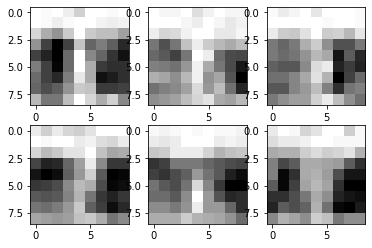

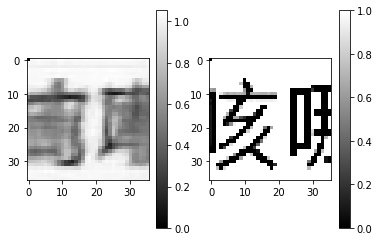

mse 0.13895514221451527
500/500 - 212s - loss: 0.1006 - mse: 0.1006 - val_loss: 0.1041 - val_mse: 0.1041
Epoch 68/200
500/500 - 212s - loss: 0.1009 - mse: 0.1009 - val_loss: 0.1049 - val_mse: 0.1049
Epoch 69/200
500/500 - 212s - loss: 0.1006 - mse: 0.1006 - val_loss: 0.1039 - val_mse: 0.1039
Epoch 70/200
500/500 - 212s - loss: 0.1003 - mse: 0.1003 - val_loss: 0.1029 - val_mse: 0.1029
Epoch 71/200
500/500 - 212s - loss: 0.1005 - mse: 0.1005 - val_loss: 0.1051 - val_mse: 0.1051
Epoch 72/200


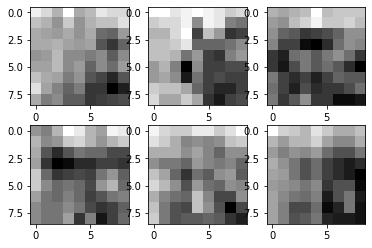

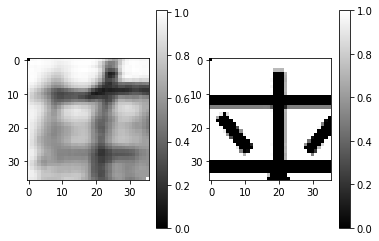

mse 0.19855768074858104
500/500 - 213s - loss: 0.1006 - mse: 0.1006 - val_loss: 0.1038 - val_mse: 0.1038
Epoch 73/200
500/500 - 212s - loss: 0.1004 - mse: 0.1004 - val_loss: 0.1017 - val_mse: 0.1017
Epoch 74/200
500/500 - 212s - loss: 0.1002 - mse: 0.1002 - val_loss: 0.1036 - val_mse: 0.1036
Epoch 75/200
500/500 - 212s - loss: 0.1016 - mse: 0.1016 - val_loss: 0.1045 - val_mse: 0.1045
Epoch 76/200
500/500 - 211s - loss: 0.1004 - mse: 0.1004 - val_loss: 0.1033 - val_mse: 0.1033
Epoch 77/200


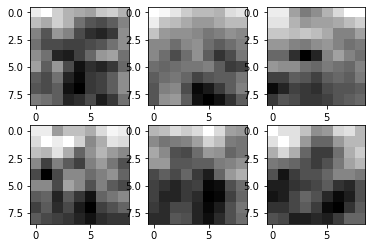

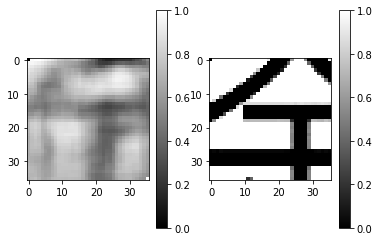

mse 0.20029965973213498
500/500 - 212s - loss: 0.1002 - mse: 0.1002 - val_loss: 0.1044 - val_mse: 0.1044
Epoch 78/200
500/500 - 212s - loss: 0.1010 - mse: 0.1010 - val_loss: 0.1051 - val_mse: 0.1051
Epoch 79/200
500/500 - 211s - loss: 0.1004 - mse: 0.1004 - val_loss: 0.1027 - val_mse: 0.1027
Epoch 80/200
500/500 - 211s - loss: 0.1001 - mse: 0.1001 - val_loss: 0.1072 - val_mse: 0.1072
Epoch 81/200
500/500 - 212s - loss: 0.1001 - mse: 0.1001 - val_loss: 0.1060 - val_mse: 0.1060
Epoch 82/200


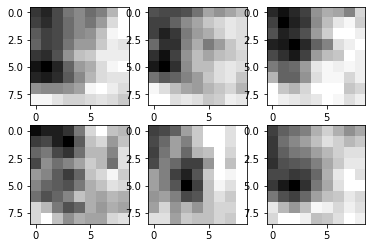

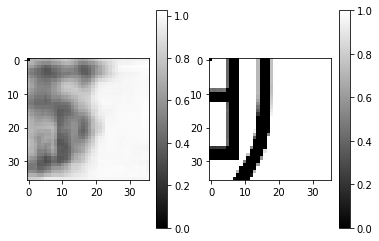

mse 0.12437494500053815
500/500 - 213s - loss: 0.1006 - mse: 0.1006 - val_loss: 0.1089 - val_mse: 0.1089
Epoch 83/200
500/500 - 211s - loss: 0.0999 - mse: 0.0999 - val_loss: 0.1036 - val_mse: 0.1036
Epoch 84/200
500/500 - 211s - loss: 0.1008 - mse: 0.1008 - val_loss: 0.1053 - val_mse: 0.1053
Epoch 85/200
500/500 - 211s - loss: 0.1006 - mse: 0.1006 - val_loss: 0.1055 - val_mse: 0.1055
Epoch 86/200
500/500 - 212s - loss: 0.0998 - mse: 0.0998 - val_loss: 0.1061 - val_mse: 0.1061
Epoch 87/200


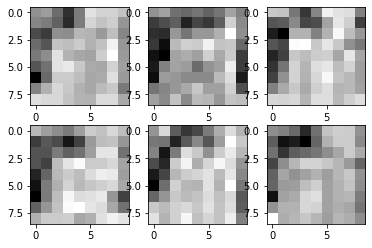

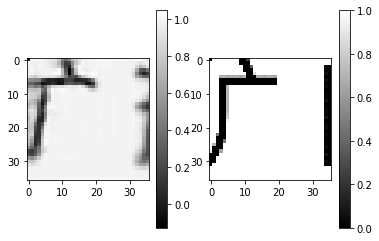

mse 0.04091342329071055
500/500 - 212s - loss: 0.1005 - mse: 0.1005 - val_loss: 0.1049 - val_mse: 0.1049
Epoch 88/200
500/500 - 211s - loss: 0.0997 - mse: 0.0997 - val_loss: 0.1068 - val_mse: 0.1068
Epoch 89/200
500/500 - 211s - loss: 0.1005 - mse: 0.1005 - val_loss: 0.1051 - val_mse: 0.1051
Epoch 90/200
500/500 - 212s - loss: 0.1003 - mse: 0.1003 - val_loss: 0.1044 - val_mse: 0.1044
Epoch 91/200
500/500 - 211s - loss: 0.1000 - mse: 0.1000 - val_loss: 0.1035 - val_mse: 0.1035
Epoch 92/200


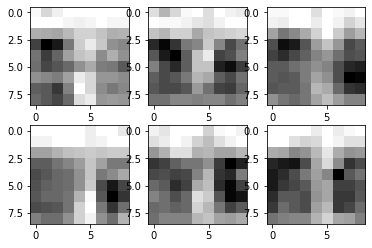

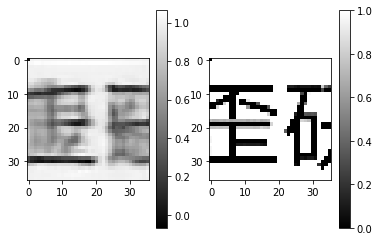

mse 0.10277547356588684
500/500 - 212s - loss: 0.0998 - mse: 0.0998 - val_loss: 0.1033 - val_mse: 0.1033
Epoch 93/200
500/500 - 212s - loss: 0.1004 - mse: 0.1004 - val_loss: 0.1036 - val_mse: 0.1036
Epoch 94/200
500/500 - 211s - loss: 0.1001 - mse: 0.1001 - val_loss: 0.1024 - val_mse: 0.1024
Epoch 95/200
500/500 - 211s - loss: 0.1009 - mse: 0.1009 - val_loss: 0.1036 - val_mse: 0.1036
Epoch 96/200
500/500 - 211s - loss: 0.1002 - mse: 0.1002 - val_loss: 0.1075 - val_mse: 0.1075
Epoch 97/200


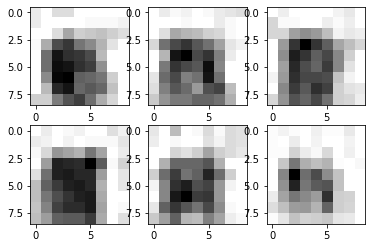

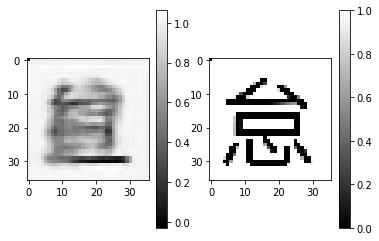

mse 0.10851914923228796
500/500 - 212s - loss: 0.1005 - mse: 0.1005 - val_loss: 0.1041 - val_mse: 0.1041
Epoch 98/200


In [0]:
model.fit_generator(train_generator,epochs=200,steps_per_epoch=500,validation_data=test_generator,validation_steps=50,validation_freq=1,verbose=2,callbacks=[cp_callback,show_accuracy_callback])


In [0]:
def predict_pic(xpics,model):
  # xpic: array of 5 with size(22,52,1)
  picsizex = xpics[0].shape[0]
  picsizey = xpics[0].shape[1]
  print(xpics[0].shape)
  picout = np.zeros((picsizex*enhance,picsizey*enhance,datasizex*datasizey),dtype=np.float32)
  piclayer = np.zeros((picsizex*enhance,picsizey*enhance),dtype=int)
  for posx in range(0,picsizex+1-datasizex):
    for posy in range(0,picsizey+1-datasizey):
      dataout = [pic[np.newaxis,posx:posx+datasizex,posy:posy+datasizey,:] for pic in xpics]
      pred = model.predict(dataout)
      for px in range(datasizex*enhance):
        for py in range(datasizey*enhance):
          picout[posx*enhance+px,posy*enhance+py,piclayer[posx*enhance+px,posy*enhance+py]] = pred[0,px,py,0]
          piclayer[posx*enhance+px,posy*enhance+py]+=1      
    
  #picout2 = np.zeros((picsizex*enhance,picsizey*enhance)）
  mina = np.percentile(picout, 20, axis=2)
  maxa = np.percentile(picout, 80, axis=2)
  for posx in range(0,picsizex):
    for posy in range(0,picsizey):                     
      for j in range(piclayer[posx,posy]):
        if(picout[posx,posy,j]>maxa[posx,posy] or picout[posx,posy,j]<mina[posx,posy]):
          if(piclayer[posx,posy]>1):
            picout[posx,posy,j]=0
            piclayer[posx,posy]-=1
          else:
            picout[posx,posy,j]=1
  picout2 = np.sum(picout,axis=2)
  picout2 /= piclayer
  return picout2


In [0]:
!git clone https://github.com/daibiaoxuwu/526
!git clone https://github.com/daibiaoxuwu/526b
t1,t2,t3,t4 = read_data('526','526b',11,22)
for t in range(5):
    data,ans = next(t1)

    import matplotlib
    cmap = matplotlib.cm.gray 
    cmap.set_bad(color='black')

    pred = predict_pic(data,model)

    for i in range(1):
      #plt.subplot(231+i)
      b,g,r = cv2.split(data[i])       # get b,g,r
      rgb_img = cv2.merge([r,g,b])     # switch it to rgb
      plt.imshow(rgb_img)

    plt.show()      
    ans[0,0]=1
    

    #plt.subplot(121)
    plt.imshow(pred,cmap=cmap)
    plt.show()
    #plt.colorbar()
    #ans = np.clip((ans-np.percentile(ans,10))/(np.percentile(ans,90)-np.percentile(ans,10)),0,1)
    #plt.subplot(122)
    plt.imshow(ans,cmap=cmap)
    plt.show()


In [0]:
import time
for it in range(0,6):
  print('-------------------',it)
  psnr = 0
  for t in range(5):
    data,ans = next(test_pic_generators[it])

    import matplotlib
    cmap = matplotlib.cm.gray 
    cmap.set_bad(color='black')

    t=time.time()
    pred = predict_pic(data,model)
    print(time.time()-t)
    for i in range(1):
      #plt.subplot(231+i)
      b,g,r = cv2.split(data[i])       # get b,g,r
      rgb_img = cv2.merge([r,g,b])     # switch it to rgb
      plt.imshow(rgb_img[:,:80,:])

    plt.show()      
    ans[0,0]=1
    

    #plt.subplot(121)
    plt.imshow(pred[:,:80],cmap=cmap)
    plt.show()
    #plt.colorbar()
    #ans = np.clip((ans-np.percentile(ans,10))/(np.percentile(ans,90)-np.percentile(ans,10)),0,1)
    #plt.subplot(122)
    plt.imshow(ans[:,:80],cmap=cmap)
    plt.show()
    psnr += peak_signal_noise_ratio(np.clip(pred,0,1), np.rot90(ans,2))
  print('psnr',psnr/5)
    #plt.colorbar()
    
    #      print('psnr',peak_signal_noise_ratio(np.clip(pred[0,:,:,0],0,1),ans))
    #      print('ssim',structural_similarity(np.clip(pred[0,:,:,0],0,1),ans))
    #print('mse',mean_squared_error(np.clip(pred,0,1),ans))


In [0]:
!git clone https://github.com/daibiaoxuwu/test73
import matplotlib
imgs = []
import skimage
from skimage import transform,data
cmap = matplotlib.cm.gray 
cmap.set_bad(color='black')

for filename in os.listdir('test73'):
      if 'git' in filename or 'c.jpg' in filename: continue
      img = cv2.imread(os.path.join('test73',filename)).astype('float32')/255.0
      img = skimage.transform.rescale(img, (0.5,0.5,1))
      print(img.shape)
      imgs.append(img)

out = predict_pic(imgs[:picnum],model)
cmap = matplotlib.cm.gray 
cmap.set_bad(color='black')

plt.imshow(out[:,:80],cmap=cmap)
plt.show()
b,g,r = cv2.split(img)       # get b,g,r
img = cv2.merge([r,g,b])     # switch it to rgb
#plt.imshow(img[:,:80,:])
plt.imshow(img[:,:20],cmap=cmap)
plt.show()
#print(peak_signal_noise_ratio(np.clip(out,0,1),ans))

In [0]:
def predict_pic(xpics,model):
  # xpic: array of 5 with size(22,52,1)
  picsizex = xpics[0].shape[0]
  picsizey = xpics[0].shape[1]
  picout = np.zeros((picsizex*enhance,picsizey*enhance),dtype=np.float32)
  piclayer = np.zeros((picsizex*enhance,picsizey*enhance),dtype=int)
  for posx in range(0,picsizex+1-datasizex):
    for posy in range(0,picsizey+1-datasizey):
      dataout = [pic[np.newaxis,posx:posx+datasizex,posy:posy+datasizey,:] for pic in xpics]
      pred = model.predict(dataout)
      picout[posx*enhance:(posx+datasizex)*enhance,posy*enhance:(posy+datasizey)*enhance] += pred[0,:,:,0]
      piclayer[posx*enhance:(posx+datasizex)*enhance,posy*enhance:(posy+datasizey)*enhance] += np.ones((datasizex*enhance,datasizey*enhance),dtype=int)
  picout /= piclayer
  return picout


In [0]:
for it in range(6):
  print('-------------------',it)
  for t in range(5):
    data,ans = next(test_pic_generators[it])

    import matplotlib
    cmap = matplotlib.cm.gray 
    cmap.set_bad(color='black')

    pred = predict_pic(data,new_model)

    for i in range(6):
      plt.subplot(231+i)
      b,g,r = cv2.split(data[i])       # get b,g,r
      rgb_img = cv2.merge([r,g,b])     # switch it to rgb
      plt.imshow(rgb_img)

    plt.show()      
    pred[0,0]=0
    pred[-1,-1]=1
    ans[0,0]=0
    ans[-1,-1]=1
    plt.subplot(121)
    plt.imshow(pred,cmap=cmap)
    plt.colorbar()
    #ans = np.clip((ans-np.percentile(ans,10))/(np.percentile(ans,90)-np.percentile(ans,10)),0,1)
    plt.subplot(122)
    plt.imshow(ans,cmap=cmap)
    plt.colorbar()
    plt.show()
    #      print('psnr',peak_signal_noise_ratio(np.clip(pred[0,:,:,0],0,1),ans))
    #      print('ssim',structural_similarity(np.clip(pred[0,:,:,0],0,1),ans))
    #print('mse',mean_squared_error(np.clip(pred,0,1),ans))


In [0]:
_,_,t1,t2 = read_data('317','317b',11,22)
for it in range(5):
    print('-------------------',it)

    data,ans = next(t2)

    import matplotlib
    cmap = matplotlib.cm.gray 
    cmap.set_bad(color='black')

    pred = predict_pic(data,new_model)

    for i in range(6):
      plt.subplot(231+i)
      b,g,r = cv2.split(data[i])       # get b,g,r
      rgb_img = cv2.merge([r,g,b])     # switch it to rgb
      plt.imshow(rgb_img)

    plt.show()      
    pred[0,0]=0
    pred[-1,-1]=1
    ans[0,0]=0
    ans[-1,-1]=1
    plt.subplot(121)
    plt.imshow(pred,cmap=cmap)
    plt.colorbar()
    #ans = np.clip((ans-np.percentile(ans,10))/(np.percentile(ans,90)-np.percentile(ans,10)),0,1)
    plt.subplot(122)
    plt.imshow(ans,cmap=cmap)
    plt.colorbar()
    plt.show()
    #      print('psnr',peak_signal_noise_ratio(np.clip(pred[0,:,:,0],0,1),ans))
    #      print('ssim',structural_similarity(np.clip(pred[0,:,:,0],0,1),ans))
    #print('mse',mean_squared_error(np.clip(pred,0,1),ans))
